# Modelling Antibiotics Resistance through virtual simulations
authors: Talhah Peerbhai (talhah@cmu.edu), Hanna Qasim (hqasim@andrew.cmu.edu)

In [14]:
# Run this to initialize the model
import importlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# Due to the nature of jupyter it doesn't take into account the code outside changing unless kernel restarted
# this is a workaround as per https://stackoverflow.com/questions/64158622/jupyter-does-not-see-changes-in-the-imported-module
imported_module = importlib.import_module("simulation_model.simulation_model")
importlib.reload(imported_module)
from simulation_model.simulation_model import *

params = {
    # Environmental parameters
    "width": 10,
    "height": 10,
    "diffusion_coefficient": 0.1,
    # Bacterium parameters
    "num_agents": 1,
    "nutrient_intake": 1,
    "antibiotic_intake": 1,
    "biomass_threshold": 10,
    "initial_size": 10,
    "initial_biomass": 0.1,
    "minimum_biomass": 5,
    "lag_phase_length": 66,
    "lag_phase_true": True,
    "survival_cost": 3,
}

model = SimModel(params)

/home/talhah/Projects/gcb-antibiotics-sim/simulation_model/simulation_model.py:116: UserWarning: Default value 0 (int) might not be best suitable with dtype=float64.
  # Initialize Grid Properties


### View Nutrient distribution

Currently there are 300.0 nutrients


[Text(0.5, 1.0, 'Nutrient distribution')]

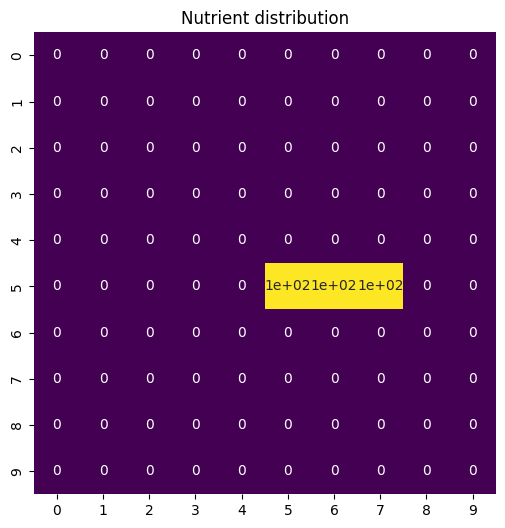

In [6]:
amount = 0
nutrient_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    amount += model.grid.properties["nutrient"].data[x][y]
    nutrient_counts[x][y] = model.grid.properties["nutrient"].data[x][y]

print(f"Currently there are {amount} nutrients")
g = sns.heatmap(nutrient_counts, cmap="viridis", annot=True, cbar=False, square=True)
g.figure.set_size_inches(6, 6)
g.set(title="Nutrient distribution")

### View Nutrient distribution over time with animation

In [116]:
def update(frame_number, nutrient_counts, model, fig, ax):
    ax.clear()  # Clear current axis to redraw
    amount = 0
    for cell_content, (x, y) in model.grid.coord_iter():
        amount += model.grid.properties["nutrient"].data[x][y]
        nutrient_counts[x,y] = model.grid.properties["nutrient"].data[x][y]
    
    sns.heatmap(nutrient_counts, cmap="viridis", annot=True, 
                cbar=False, square=True, ax=ax)
    
    ax.set(title=f"Nutrient distribution at step {frame_number + 1}\nTotal nutrients: {amount}")

    model.step()

nutrient_counts = np.zeros((model.grid.width, model.grid.height))
fig, ax = plt.subplots(figsize=(6, 6))

# Animation function, range will determine how many steps are taken
ani = FuncAnimation(fig, update, frames=range(50), fargs=(nutrient_counts, model, fig, ax), 
                    interval=200, repeat=False)

plt.close()
# Save animation, REQUIRES FFMPEG which is standard on most linux distros
ani.save('nutrient_spread.mp4', writer='ffmpeg')
# If this fails then run this and ensure you have pillow with pip install pillow, ask me for help if it still doesn't work
# ani.save('nutrient_spread.gif', writer='pillow')  # Save as GIF

### View Agent distribution

[Text(0.5, 1.0, 'Agent Distribution')]

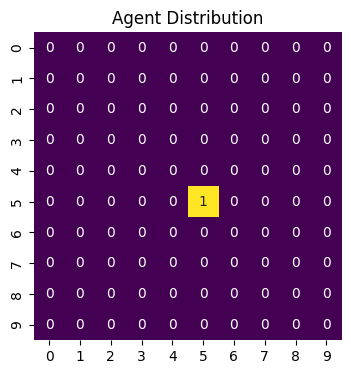

In [105]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
f = sns.heatmap(agent_counts, cmap="viridis", annot=True, cbar=False, square=True)
f.figure.set_size_inches(4, 4)
f.set(title="Agent Distribution")

### Step Through model

In [ ]:
for _ in range(100):
    model.step()

In [15]:
def update(frame_number, nutrient_counts, bacteria_locations, model, fig, ax):
    ax.clear()  # Clear current axis to redraw
    nutrient_counts.fill(0)  # Reset nutrient counts to zero for the new frame
    bacteria_locations.fill(0)  # Reset bacteria locations to zero for the new frame
    
    amount = 0
    # Update nutrient counts
    for cell_content, (x, y) in model.grid.coord_iter():
        amount += model.grid.properties["nutrient"].data[x][y]
        nutrient_counts[x, y] = model.grid.properties["nutrient"].data[x][y]
        
    # Update bacteria locations
    for agent in model.schedule.agents:
        if hasattr(agent, 'pos'):  # Ensure agent has a position
            bx, by = agent.pos
            bacteria_locations[bx, by] = 1  # Mark location as occupied by bacteria
    
    # Create a combined plot
    overlay = np.ma.masked_where(bacteria_locations == 0, bacteria_locations) # Mask where there is no bacteria
    sns.heatmap(nutrient_counts, cmap="viridis", annot=False, cbar=False, square=True, ax=ax)  # Plot for nutrients
    sns.heatmap(overlay, cmap="autumn", annot=False, cbar=False, square=True, ax=ax, alpha=0.6)  # Overlay for bacteria locations
    
    ax.set(title=f"Nutrient distribution and bacteria movement at step {frame_number + 1}\nTotal nutrients: {amount}")
    model.step()

# Assume the `model` is already initiated
nutrient_counts = np.zeros((model.grid.width, model.grid.height))
bacteria_locations = np.zeros_like(nutrient_counts)  # Supplementary array for marking bacteria locations
fig, ax = plt.subplots(figsize=(8, 8))
    
ani = FuncAnimation(fig, update, frames=range(100), fargs=(nutrient_counts, bacteria_locations, model, fig, ax), 
                    interval=200, repeat=False)

plt.close()  # Prevents the final frame plot from showing immediately

# Saving the animation
ani.save('bacteria_nutrient_overlay.mp4', writer='ffmpeg')